# Bird image classification
### Ariane ALIX
### 26/11/2019

In [1]:
%load_ext autoreload

%autoreload 2

In [4]:
import time

import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision
from torchvision import datasets
from torch.autograd import Variable
from tqdm import tqdm

## 1. Experimenting simple models and ideas
### 1.1 Initial model (given)

In [12]:
%run main.py --epochs=10

Using CPU


In [21]:
for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

Train Epoch: 1 [0/1082 (0%)]	Loss: 2.989828
Train Epoch: 1 [640/1082 (59%)]	Loss: 3.007554

Validation set: Average loss: 0.0580, Accuracy: 5/103 (5%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/1082 (0%)]	Loss: 2.981745
Train Epoch: 2 [640/1082 (59%)]	Loss: 2.971583

Validation set: Average loss: 0.0573, Accuracy: 4/103 (4%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/1082 (0%)]	Loss: 2.942628
Train Epoch: 3 [640/1082 (59%)]	Loss: 2.830668

Validation set: Average loss: 0.0543, Accuracy: 17/103 (17%)
Saved model to experiment/model_3.pth. You can run `python evaluate.py --model experiment/model_3.pth` to generate the Kaggle formatted csv file

Train Epoch: 4 [0/1082 (0%)]	Loss: 2.789883
Train Epoch: 4 [640/1082 (59%)]	Loss: 2.713978

Validation set:

### 1.2 New model based on animal (faces) recognition paper > Net2

https://www.researchgate.net/publication/320162958_Animal_Recognition_System_Based_on_Convolutional_Neural_Network

It is interesting because the original version was made to look at faces of animals (with some quite similar, like foxes and wolves) which have patterns of hair like birds with their feathers; moreover, the size of the filters were kept because their picture were 2 times less wide (32x32), but were approximately twice as zoomed on the zone of interest.

Another interseting fact is the use of a dropout : it drops out outputs with a probability of 0.1 to avoid overfitting (it was 0.25 in their case but they has fewer classes, and we don't want to lose to much of one class if we are not lucky).

We also added padding and changed the number of classes and final neurons in the last layers to stay proportionnal, and deleted the softmax at the end.

In [21]:
%run main.py --epochs=10

Using CPU


In [23]:
for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

Train Epoch: 1 [0/2164 (0%)]	Loss: 3.009687
Train Epoch: 1 [640/2164 (29%)]	Loss: 2.938819
Train Epoch: 1 [1280/2164 (59%)]	Loss: 2.941729
Train Epoch: 1 [1920/2164 (88%)]	Loss: 2.958346

Validation set: Average loss: 0.0553, Accuracy: 12/103 (12%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 2.730878
Train Epoch: 2 [640/2164 (29%)]	Loss: 2.781794
Train Epoch: 2 [1280/2164 (59%)]	Loss: 2.799252
Train Epoch: 2 [1920/2164 (88%)]	Loss: 2.523937

Validation set: Average loss: 0.0534, Accuracy: 18/103 (17%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 2.781735
Train Epoch: 3 [640/2164 (29%)]	Loss: 2.570157
Train Epoch: 3 [1280/2164 (59%)]	Loss: 2.625766
Train Epoch: 3 [1920/2164 (88%)]	Loss: 2.545475

Validation set: Averag

**_**
We see better results, still not that good.

### 1.3 CPU vs local GPU

*main.py* has been modified to choose as args if we want to use the CPU or GPU. We test the two on 5 epochs.

In [18]:
### CPU
start=time.time()

%run main.py --epochs=5 --cgpu='CPU'

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')    
    
    
### GPU 
start=time.time()

%run main.py --epochs=5 --cgpu='GPU'    
    
for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')
    
print('GPU- Time of execution :',time.time()-start,'s') 

Using CPU
Train Epoch: 1 [0/2164 (0%)]	Loss: 3.003148
Train Epoch: 1 [640/2164 (29%)]	Loss: 2.972824
Train Epoch: 1 [1280/2164 (59%)]	Loss: 2.909789
Train Epoch: 1 [1920/2164 (88%)]	Loss: 2.981264

Validation set: Average loss: 0.0566, Accuracy: 7/103 (7%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 2.835259
Train Epoch: 2 [640/2164 (29%)]	Loss: 2.937826
Train Epoch: 2 [1280/2164 (59%)]	Loss: 2.675451
Train Epoch: 2 [1920/2164 (88%)]	Loss: 2.812554

Validation set: Average loss: 0.0512, Accuracy: 13/103 (13%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 2.756968
Train Epoch: 3 [640/2164 (29%)]	Loss: 2.582169
Train Epoch: 3 [1280/2164 (59%)]	Loss: 2.540673
Train Epoch: 3 [1920/2164 (88%)]	Loss: 2.567905

Validation set

**_**
Almost the same time. We will keep using the CPU.

## 2. Using pre-trained models
### 2.1 Testing ResNet34 without any modification except changing the last layer 
So that it matches our case (20 classes). (Still using the expanded dataset with random modifications). We let all the layers free to evolve so we can fintune all the parameters of the net.

#### 2.1.1 Look for good learning rate

Using CPU


HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


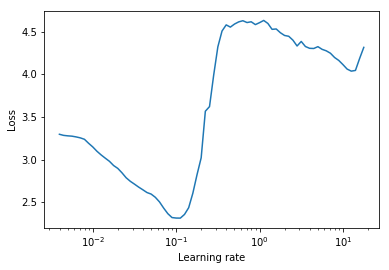

In [8]:
from torch_lr_finder import LRFinder

%run main.py --epochs=10 --cgpu='CPU'

#training dataset
training_set = torch.utils.data.DataLoader(
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms), batch_size=args.batch_size, shuffle=True, num_workers=1)



#Model
model = torchvision.models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)
#model.load_state_dict(torch.load('experiment/model_saved_res152.pth'))

#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [9]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]


print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 2.31264224103441 reached for LR = 0.11220184543019632


#### 2.1.2 Trying the ResNet34 with a 0.11 learning rate (found above)

In [11]:
start=time.time()
%run main.py --epochs=10 --cgpu='CPU' --lr=0.11

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')   

Using CPU
Train Epoch: 1 [0/1082 (0%)]	Loss: 3.519068
Train Epoch: 1 [640/1082 (59%)]	Loss: 3.413718

Validation set: Average loss: 6.0332, Accuracy: 7/103 (7%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/1082 (0%)]	Loss: 2.925918
Train Epoch: 2 [640/1082 (59%)]	Loss: 2.799205

Validation set: Average loss: 0.0518, Accuracy: 14/103 (14%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/1082 (0%)]	Loss: 2.726650
Train Epoch: 3 [640/1082 (59%)]	Loss: 2.678522

Validation set: Average loss: 0.0519, Accuracy: 17/103 (17%)
Saved model to experiment/model_3.pth. You can run `python evaluate.py --model experiment/model_3.pth` to generate the Kaggle formatted csv file

Train Epoch: 4 [0/1082 (0%)]	Loss: 2.507774
Train Epoch: 4 [640/1082 (59%)]	Loss: 2.305955

Val

#### 2.1.3 Keeping the best training and looking again for the best LR

HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


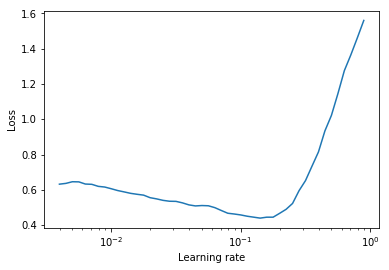

In [13]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)
model.load_state_dict(torch.load('experiment/model_res34_step1.pth'))

#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [14]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 0.44053973368943405 reached for LR = 0.14125375446227542


#### 2.1.4  Relaunching the ResNet34 from the best training saved with a 0.11 learning rate.

In [18]:
start=time.time()
%run main.py --epochs=50 --cgpu='CPU' --lr=0.14

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')   

Using CPU
Train Epoch: 1 [0/1082 (0%)]	Loss: 0.690365
Train Epoch: 1 [640/1082 (59%)]	Loss: 0.960003
\Training set: ccuracy: 801/1082

Validation set: Average loss: 0.0605, Accuracy: 45/103 (44%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/1082 (0%)]	Loss: 0.753638
Train Epoch: 2 [640/1082 (59%)]	Loss: 0.531909
\Training set: ccuracy: 807/1082

Validation set: Average loss: 0.0575, Accuracy: 36/103 (35%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/1082 (0%)]	Loss: 0.591375
Train Epoch: 3 [640/1082 (59%)]	Loss: 0.299660
\Training set: ccuracy: 922/1082

Validation set: Average loss: 0.0498, Accuracy: 47/103 (46%)
Saved model to experiment/model_3.pth. You can run `python evaluate.py --model experiment/model_3.pth` to generate the Kaggle formatted csv 

Train Epoch: 26 [0/1082 (0%)]	Loss: 0.000916
Train Epoch: 26 [640/1082 (59%)]	Loss: 0.000406
\Training set: ccuracy: 1082/1082

Validation set: Average loss: 0.0661, Accuracy: 49/103 (48%)
Saved model to experiment/model_26.pth. You can run `python evaluate.py --model experiment/model_26.pth` to generate the Kaggle formatted csv file

Train Epoch: 27 [0/1082 (0%)]	Loss: 0.000771
Train Epoch: 27 [640/1082 (59%)]	Loss: 0.000280
\Training set: ccuracy: 1082/1082

Validation set: Average loss: 0.0652, Accuracy: 48/103 (47%)
Saved model to experiment/model_27.pth. You can run `python evaluate.py --model experiment/model_27.pth` to generate the Kaggle formatted csv file

Train Epoch: 28 [0/1082 (0%)]	Loss: 0.000933
Train Epoch: 28 [640/1082 (59%)]	Loss: 0.000165
\Training set: ccuracy: 1082/1082

Validation set: Average loss: 0.0665, Accuracy: 50/103 (49%)
Saved model to experiment/model_28.pth. You can run `python evaluate.py --model experiment/model_28.pth` to generate the Kaggle formatted


Validation set: Average loss: 0.0638, Accuracy: 47/103 (46%)
Saved model to experiment/model_50.pth. You can run `python evaluate.py --model experiment/model_50.pth` to generate the Kaggle formatted csv file

CPU- Time of execution : 3971.390746116638 s


We see that even after 50 epochs, the accuracy is really good on the training data, but saturates around 48% for the validation : there is **overfitting** ! <br/>
To try and avoid that, and increase the accuracy, we will try to :
- switch to a ResNet18,
- augment the dataset, 
- resize the pictures to a bigger size,
- freeze some layers of the Net. We will begin by freezing all of them except the last one, and progressively unfreeze them from the bottom.

### 2.2 Expanding the database to reduce overfitting
We created new training data by adding rescaled, rotated and shifted pictures of the original ones : cf. *data.py*.
It modifies the pictures by doing randomly:
- a change of the scale, size and ratio by modifying them randomly and recroping to get 64x64 px 
- a rotation of -45 to +45 degrees and a potential vertical flip to represent possible positions of the bord,
- a potential change of perspective

We modified the *main.py* file so that we can choose in the arguments if we want to use an augmented dataset or not.

Let's try to finetune a ResNet18 (all parameters).

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\alixa/.cache\torch\checkpoints\resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:15<00:00, 3.00MB/s]


HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


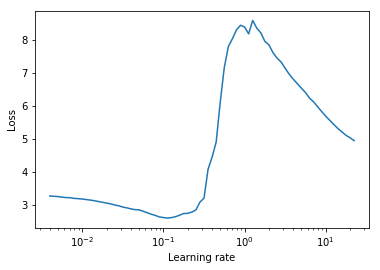

In [37]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
torch.utils.data.ConcatDataset([
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms),
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms_2)]), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)


#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [38]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 2.61430686391492 reached for LR = 0.11220184543019632


In [39]:
%run main.py --epochs=20 --cgpu='CPU' --lr=0.11 --augmented=True

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')


Using CPU
Train Epoch: 1 [0/2164 (0%)]	Loss: 3.290512
Train Epoch: 1 [640/2164 (29%)]	Loss: 4.016858
Train Epoch: 1 [1280/2164 (59%)]	Loss: 3.646543
Train Epoch: 1 [1920/2164 (88%)]	Loss: 3.285409
Training set: Accuracy: 239/2164

Validation set: Average loss: 0.3679, Accuracy: 8/103 (8%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 3.477355
Train Epoch: 2 [640/2164 (29%)]	Loss: 2.812068
Train Epoch: 2 [1280/2164 (59%)]	Loss: 2.614039
Train Epoch: 2 [1920/2164 (88%)]	Loss: 2.290019
Training set: Accuracy: 444/2164

Validation set: Average loss: 0.0514, Accuracy: 31/103 (30%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 2.212065
Train Epoch: 3 [640/2164 (29%)]	Loss: 2.369624
Train Epoch: 3 [1280/2164 (59%)]	Loss: 2.1337

Train Epoch: 20 [0/2164 (0%)]	Loss: 0.521486
Train Epoch: 20 [640/2164 (29%)]	Loss: 0.388200
Train Epoch: 20 [1280/2164 (59%)]	Loss: 0.490635
Train Epoch: 20 [1920/2164 (88%)]	Loss: 0.234678
Training set: Accuracy: 1880/2164

Validation set: Average loss: 0.0550, Accuracy: 50/103 (49%)
Saved model to experiment/model_20.pth. You can run `python evaluate.py --model experiment/model_20.pth` to generate the Kaggle formatted csv file



We get results a bit better with less epochs :we will use an augmented dataset from now on; but the model can still be improved.<br/>
Let's try freezing some layers + resizing the pictures to a bigger size by modifying the *data_transform* functions !

### 2.3 Freezing layers (+ resizing the pictures to 256x256)

Pictures have been resized !

#### 2.3.1 Counting the layers

In [40]:
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)

layer = 0
for name, child in model.named_children():
    layer += 1
    
print('Number of layers in the net :',layer)

Number of layers in the net : 10


#### 2.3.2 Freezing all layers except the last
(The training should be faster)

Using CPU


HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


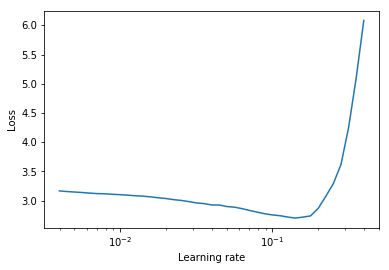

In [6]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
torch.utils.data.ConcatDataset([
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms),
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms_2)]), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)

# We freeze the 9 first layers
layer = 0
for name, child in model.named_children():
    layer += 1
    if layer <= 9:
        for name2, params in child.named_parameters():
            params.requires_grad = False


#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [7]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 2.700276094230675 reached for LR = 0.14125375446227542


In [ ]:
start=time.time()
%run main.py --epochs=10 --cgpu='CPU' --lr=0.14 --augmented=True

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')  

Using CPU
Train Epoch: 1 [0/2164 (0%)]	Loss: 3.112243
Train Epoch: 1 [640/2164 (29%)]	Loss: 12.865611
Train Epoch: 1 [1280/2164 (59%)]	Loss: 6.955349
Train Epoch: 1 [1920/2164 (88%)]	Loss: 3.630522
Training set: Accuracy: 638/2164

Validation set: Average loss: 0.0445, Accuracy: 48/103 (47%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 2.277579
Train Epoch: 2 [640/2164 (29%)]	Loss: 1.859010
Train Epoch: 2 [1280/2164 (59%)]	Loss: 1.042526
Train Epoch: 2 [1920/2164 (88%)]	Loss: 1.272944
Training set: Accuracy: 1532/2164

Validation set: Average loss: 0.0380, Accuracy: 52/103 (50%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 1.487924
Train Epoch: 3 [640/2164 (29%)]	Loss: 0.560002


We saved the model with best validation error and lower accuracy on the training :model4 (to avoid overifitting) to 'experiment/model_res18_saved1' and model16 to 'experiment/model_res18_saved2'

HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


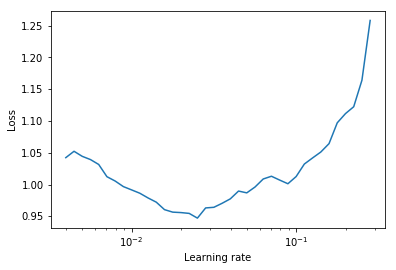

In [44]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
torch.utils.data.ConcatDataset([
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms),
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms_2)]), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)

# We freeze the 9 first layers
layer = 0
for name, child in model.named_children():
    layer += 1
    if layer <= 9:
        for name2, params in child.named_parameters():
            params.requires_grad = False
model.load_state_dict(torch.load('experiment/model_res18_saved1.pth'))
            

#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [ ]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

#### 2.3.3 Freezing the top half of the layers

In [ ]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
torch.utils.data.ConcatDataset([
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms),
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms_2)]), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)

# We freeze the 5 first layers
layer = 0
for name, child in model.named_children():
    layer += 1
    if layer <= 5:
        for name2, params in child.named_parameters():
            params.requires_grad = False


#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [32]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 2.6780490179806775 reached for LR = 0.08912509381337456


In [33]:
start=time.time()
%run main.py --epochs=10 --cgpu='CPU' --lr=0.089 --augmented=True

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')  

Using CPU
Train Epoch: 1 [0/2164 (0%)]	Loss: 3.593346
Train Epoch: 1 [640/2164 (29%)]	Loss: 4.347428
Train Epoch: 1 [1280/2164 (59%)]	Loss: 3.044508
Train Epoch: 1 [1920/2164 (88%)]	Loss: 2.800216
Training set: Accuracy: 249/2164

Validation set: Average loss: 0.0695, Accuracy: 13/103 (13%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 2.613709
Train Epoch: 2 [640/2164 (29%)]	Loss: 2.507537
Train Epoch: 2 [1280/2164 (59%)]	Loss: 2.133052
Train Epoch: 2 [1920/2164 (88%)]	Loss: 1.920328
Training set: Accuracy: 588/2164

Validation set: Average loss: 0.0464, Accuracy: 30/103 (29%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 1.750473
Train Epoch: 3 [640/2164 (29%)]	Loss: 1.663415
Train Epoch: 3 [1280/2164 (59%)]	Loss: 1.59

#### 2.3.4 Freezing the bottom half of the layer (except the last)

HBox(children=(IntProgress(value=0), HTML(value='')))

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


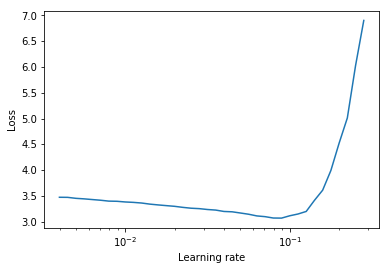

In [34]:
from torch_lr_finder import LRFinder


#training dataset
training_set = torch.utils.data.DataLoader(
torch.utils.data.ConcatDataset([
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms),
    datasets.ImageFolder(args.data + '/train_images',
                         transform=data_transforms_2)]), batch_size=args.batch_size, shuffle=True, num_workers=1)


#Model
model = torchvision.models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 20)

# We freeze the 4 next to last layers
layer = 0
for name, child in model.named_children():
    layer += 1
    if 5 < layer <= 9:
        for name2, params in child.named_parameters():
            params.requires_grad = False


#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=args.momentum)

#Criterion
criterion = nn.CrossEntropyLoss()

lr_finder = LRFinder(model, optimizer, criterion)
lr_finder.range_test(train_loader=training_set,val_loader=None, end_lr=100, num_iter=100)
lr_finder.plot()

In [35]:
lrs = lr_finder.history["lr"]#avoid the first small values
losses = lr_finder.history["loss"]

print('The smallest lost is :',np.min(losses),'reached for LR =',lrs[np.argmin(losses)])

The smallest lost is : 3.068930059111452 reached for LR = 0.08912509381337456


In [36]:
start=time.time()
%run main.py --epochs=20 --cgpu='CPU' --lr=0.089 --augmented=True

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

print('CPU- Time of execution :',time.time()-start,'s')  

Using CPU
Train Epoch: 1 [0/2164 (0%)]	Loss: 3.593346
Train Epoch: 1 [640/2164 (29%)]	Loss: 9.133324
Train Epoch: 1 [1280/2164 (59%)]	Loss: 8.678043
Train Epoch: 1 [1920/2164 (88%)]	Loss: 4.248317
Training set: Accuracy: 246/2164

Validation set: Average loss: 0.1154, Accuracy: 14/103 (14%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 4.618398
Train Epoch: 2 [640/2164 (29%)]	Loss: 4.128091
Train Epoch: 2 [1280/2164 (59%)]	Loss: 3.448338
Train Epoch: 2 [1920/2164 (88%)]	Loss: 3.882566
Training set: Accuracy: 437/2164

Validation set: Average loss: 0.1286, Accuracy: 12/103 (12%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 5.651033
Train Epoch: 3 [640/2164 (29%)]	Loss: 3.715169
Train Epoch: 3 [1280/2164 (59%)]	Loss: 3.90

KeyboardInterrupt: 

### Idea : Reloading best previous state and retraining on difficult pictures
#### (pictures where the error was higher)

In [22]:
import matplotlib.pyplot as plt

In [20]:
print(data.shape)

torch.Size([39, 3, 64, 64])


In [5]:
%run main.py --epochs=5 --cgpu='CPU'

for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')


RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "layer1.0.conv3.weight", "layer1.0.bn3.running_var", "layer1.0.bn3.weight", "layer1.0.bn3.running_mean", "layer1.0.bn3.bias", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.bias", "layer1.1.conv3.weight", "layer1.1.bn3.running_var", "layer1.1.bn3.weight", "layer1.1.bn3.running_mean", "layer1.1.bn3.bias", "layer1.2.conv3.weight", "layer1.2.bn3.running_var", "layer1.2.bn3.weight", "layer1.2.bn3.running_mean", "layer1.2.bn3.bias", "layer2.0.conv3.weight", "layer2.0.bn3.running_var", "layer2.0.bn3.weight", "layer2.0.bn3.running_mean", "layer2.0.bn3.bias", "layer2.1.conv3.weight", "layer2.1.bn3.running_var", "layer2.1.bn3.weight", "layer2.1.bn3.running_mean", "layer2.1.bn3.bias", "layer2.2.conv3.weight", "layer2.2.bn3.running_var", "layer2.2.bn3.weight", "layer2.2.bn3.running_mean", "layer2.2.bn3.bias", "layer2.3.conv3.weight", "layer2.3.bn3.running_var", "layer2.3.bn3.weight", "layer2.3.bn3.running_mean", "layer2.3.bn3.bias", "layer2.4.conv1.weight", "layer2.4.bn1.running_var", "layer2.4.bn1.weight", "layer2.4.bn1.running_mean", "layer2.4.bn1.bias", "layer2.4.conv2.weight", "layer2.4.bn2.running_var", "layer2.4.bn2.weight", "layer2.4.bn2.running_mean", "layer2.4.bn2.bias", "layer2.4.conv3.weight", "layer2.4.bn3.running_var", "layer2.4.bn3.weight", "layer2.4.bn3.running_mean", "layer2.4.bn3.bias", "layer2.5.conv1.weight", "layer2.5.bn1.running_var", "layer2.5.bn1.weight", "layer2.5.bn1.running_mean", "layer2.5.bn1.bias", "layer2.5.conv2.weight", "layer2.5.bn2.running_var", "layer2.5.bn2.weight", "layer2.5.bn2.running_mean", "layer2.5.bn2.bias", "layer2.5.conv3.weight", "layer2.5.bn3.running_var", "layer2.5.bn3.weight", "layer2.5.bn3.running_mean", "layer2.5.bn3.bias", "layer2.6.conv1.weight", "layer2.6.bn1.running_var", "layer2.6.bn1.weight", "layer2.6.bn1.running_mean", "layer2.6.bn1.bias", "layer2.6.conv2.weight", "layer2.6.bn2.running_var", "layer2.6.bn2.weight", "layer2.6.bn2.running_mean", "layer2.6.bn2.bias", "layer2.6.conv3.weight", "layer2.6.bn3.running_var", "layer2.6.bn3.weight", "layer2.6.bn3.running_mean", "layer2.6.bn3.bias", "layer2.7.conv1.weight", "layer2.7.bn1.running_var", "layer2.7.bn1.weight", "layer2.7.bn1.running_mean", "layer2.7.bn1.bias", "layer2.7.conv2.weight", "layer2.7.bn2.running_var", "layer2.7.bn2.weight", "layer2.7.bn2.running_mean", "layer2.7.bn2.bias", "layer2.7.conv3.weight", "layer2.7.bn3.running_var", "layer2.7.bn3.weight", "layer2.7.bn3.running_mean", "layer2.7.bn3.bias", "layer3.0.conv3.weight", "layer3.0.bn3.running_var", "layer3.0.bn3.weight", "layer3.0.bn3.running_mean", "layer3.0.bn3.bias", "layer3.1.conv3.weight", "layer3.1.bn3.running_var", "layer3.1.bn3.weight", "layer3.1.bn3.running_mean", "layer3.1.bn3.bias", "layer3.2.conv3.weight", "layer3.2.bn3.running_var", "layer3.2.bn3.weight", "layer3.2.bn3.running_mean", "layer3.2.bn3.bias", "layer3.3.conv3.weight", "layer3.3.bn3.running_var", "layer3.3.bn3.weight", "layer3.3.bn3.running_mean", "layer3.3.bn3.bias", "layer3.4.conv3.weight", "layer3.4.bn3.running_var", "layer3.4.bn3.weight", "layer3.4.bn3.running_mean", "layer3.4.bn3.bias", "layer3.5.conv3.weight", "layer3.5.bn3.running_var", "layer3.5.bn3.weight", "layer3.5.bn3.running_mean", "layer3.5.bn3.bias", "layer3.6.conv1.weight", "layer3.6.bn1.running_var", "layer3.6.bn1.weight", "layer3.6.bn1.running_mean", "layer3.6.bn1.bias", "layer3.6.conv2.weight", "layer3.6.bn2.running_var", "layer3.6.bn2.weight", "layer3.6.bn2.running_mean", "layer3.6.bn2.bias", "layer3.6.conv3.weight", "layer3.6.bn3.running_var", "layer3.6.bn3.weight", "layer3.6.bn3.running_mean", "layer3.6.bn3.bias", "layer3.7.conv1.weight", "layer3.7.bn1.running_var", "layer3.7.bn1.weight", "layer3.7.bn1.running_mean", "layer3.7.bn1.bias", "layer3.7.conv2.weight", "layer3.7.bn2.running_var", "layer3.7.bn2.weight", "layer3.7.bn2.running_mean", "layer3.7.bn2.bias", "layer3.7.conv3.weight", "layer3.7.bn3.running_var", "layer3.7.bn3.weight", "layer3.7.bn3.running_mean", "layer3.7.bn3.bias", "layer3.8.conv1.weight", "layer3.8.bn1.running_var", "layer3.8.bn1.weight", "layer3.8.bn1.running_mean", "layer3.8.bn1.bias", "layer3.8.conv2.weight", "layer3.8.bn2.running_var", "layer3.8.bn2.weight", "layer3.8.bn2.running_mean", "layer3.8.bn2.bias", "layer3.8.conv3.weight", "layer3.8.bn3.running_var", "layer3.8.bn3.weight", "layer3.8.bn3.running_mean", "layer3.8.bn3.bias", "layer3.9.conv1.weight", "layer3.9.bn1.running_var", "layer3.9.bn1.weight", "layer3.9.bn1.running_mean", "layer3.9.bn1.bias", "layer3.9.conv2.weight", "layer3.9.bn2.running_var", "layer3.9.bn2.weight", "layer3.9.bn2.running_mean", "layer3.9.bn2.bias", "layer3.9.conv3.weight", "layer3.9.bn3.running_var", "layer3.9.bn3.weight", "layer3.9.bn3.running_mean", "layer3.9.bn3.bias", "layer3.10.conv1.weight", "layer3.10.bn1.running_var", "layer3.10.bn1.weight", "layer3.10.bn1.running_mean", "layer3.10.bn1.bias", "layer3.10.conv2.weight", "layer3.10.bn2.running_var", "layer3.10.bn2.weight", "layer3.10.bn2.running_mean", "layer3.10.bn2.bias", "layer3.10.conv3.weight", "layer3.10.bn3.running_var", "layer3.10.bn3.weight", "layer3.10.bn3.running_mean", "layer3.10.bn3.bias", "layer3.11.conv1.weight", "layer3.11.bn1.running_var", "layer3.11.bn1.weight", "layer3.11.bn1.running_mean", "layer3.11.bn1.bias", "layer3.11.conv2.weight", "layer3.11.bn2.running_var", "layer3.11.bn2.weight", "layer3.11.bn2.running_mean", "layer3.11.bn2.bias", "layer3.11.conv3.weight", "layer3.11.bn3.running_var", "layer3.11.bn3.weight", "layer3.11.bn3.running_mean", "layer3.11.bn3.bias", "layer3.12.conv1.weight", "layer3.12.bn1.running_var", "layer3.12.bn1.weight", "layer3.12.bn1.running_mean", "layer3.12.bn1.bias", "layer3.12.conv2.weight", "layer3.12.bn2.running_var", "layer3.12.bn2.weight", "layer3.12.bn2.running_mean", "layer3.12.bn2.bias", "layer3.12.conv3.weight", "layer3.12.bn3.running_var", "layer3.12.bn3.weight", "layer3.12.bn3.running_mean", "layer3.12.bn3.bias", "layer3.13.conv1.weight", "layer3.13.bn1.running_var", "layer3.13.bn1.weight", "layer3.13.bn1.running_mean", "layer3.13.bn1.bias", "layer3.13.conv2.weight", "layer3.13.bn2.running_var", "layer3.13.bn2.weight", "layer3.13.bn2.running_mean", "layer3.13.bn2.bias", "layer3.13.conv3.weight", "layer3.13.bn3.running_var", "layer3.13.bn3.weight", "layer3.13.bn3.running_mean", "layer3.13.bn3.bias", "layer3.14.conv1.weight", "layer3.14.bn1.running_var", "layer3.14.bn1.weight", "layer3.14.bn1.running_mean", "layer3.14.bn1.bias", "layer3.14.conv2.weight", "layer3.14.bn2.running_var", "layer3.14.bn2.weight", "layer3.14.bn2.running_mean", "layer3.14.bn2.bias", "layer3.14.conv3.weight", "layer3.14.bn3.running_var", "layer3.14.bn3.weight", "layer3.14.bn3.running_mean", "layer3.14.bn3.bias", "layer3.15.conv1.weight", "layer3.15.bn1.running_var", "layer3.15.bn1.weight", "layer3.15.bn1.running_mean", "layer3.15.bn1.bias", "layer3.15.conv2.weight", "layer3.15.bn2.running_var", "layer3.15.bn2.weight", "layer3.15.bn2.running_mean", "layer3.15.bn2.bias", "layer3.15.conv3.weight", "layer3.15.bn3.running_var", "layer3.15.bn3.weight", "layer3.15.bn3.running_mean", "layer3.15.bn3.bias", "layer3.16.conv1.weight", "layer3.16.bn1.running_var", "layer3.16.bn1.weight", "layer3.16.bn1.running_mean", "layer3.16.bn1.bias", "layer3.16.conv2.weight", "layer3.16.bn2.running_var", "layer3.16.bn2.weight", "layer3.16.bn2.running_mean", "layer3.16.bn2.bias", "layer3.16.conv3.weight", "layer3.16.bn3.running_var", "layer3.16.bn3.weight", "layer3.16.bn3.running_mean", "layer3.16.bn3.bias", "layer3.17.conv1.weight", "layer3.17.bn1.running_var", "layer3.17.bn1.weight", "layer3.17.bn1.running_mean", "layer3.17.bn1.bias", "layer3.17.conv2.weight", "layer3.17.bn2.running_var", "layer3.17.bn2.weight", "layer3.17.bn2.running_mean", "layer3.17.bn2.bias", "layer3.17.conv3.weight", "layer3.17.bn3.running_var", "layer3.17.bn3.weight", "layer3.17.bn3.running_mean", "layer3.17.bn3.bias", "layer3.18.conv1.weight", "layer3.18.bn1.running_var", "layer3.18.bn1.weight", "layer3.18.bn1.running_mean", "layer3.18.bn1.bias", "layer3.18.conv2.weight", "layer3.18.bn2.running_var", "layer3.18.bn2.weight", "layer3.18.bn2.running_mean", "layer3.18.bn2.bias", "layer3.18.conv3.weight", "layer3.18.bn3.running_var", "layer3.18.bn3.weight", "layer3.18.bn3.running_mean", "layer3.18.bn3.bias", "layer3.19.conv1.weight", "layer3.19.bn1.running_var", "layer3.19.bn1.weight", "layer3.19.bn1.running_mean", "layer3.19.bn1.bias", "layer3.19.conv2.weight", "layer3.19.bn2.running_var", "layer3.19.bn2.weight", "layer3.19.bn2.running_mean", "layer3.19.bn2.bias", "layer3.19.conv3.weight", "layer3.19.bn3.running_var", "layer3.19.bn3.weight", "layer3.19.bn3.running_mean", "layer3.19.bn3.bias", "layer3.20.conv1.weight", "layer3.20.bn1.running_var", "layer3.20.bn1.weight", "layer3.20.bn1.running_mean", "layer3.20.bn1.bias", "layer3.20.conv2.weight", "layer3.20.bn2.running_var", "layer3.20.bn2.weight", "layer3.20.bn2.running_mean", "layer3.20.bn2.bias", "layer3.20.conv3.weight", "layer3.20.bn3.running_var", "layer3.20.bn3.weight", "layer3.20.bn3.running_mean", "layer3.20.bn3.bias", "layer3.21.conv1.weight", "layer3.21.bn1.running_var", "layer3.21.bn1.weight", "layer3.21.bn1.running_mean", "layer3.21.bn1.bias", "layer3.21.conv2.weight", "layer3.21.bn2.running_var", "layer3.21.bn2.weight", "layer3.21.bn2.running_mean", "layer3.21.bn2.bias", "layer3.21.conv3.weight", "layer3.21.bn3.running_var", "layer3.21.bn3.weight", "layer3.21.bn3.running_mean", "layer3.21.bn3.bias", "layer3.22.conv1.weight", "layer3.22.bn1.running_var", "layer3.22.bn1.weight", "layer3.22.bn1.running_mean", "layer3.22.bn1.bias", "layer3.22.conv2.weight", "layer3.22.bn2.running_var", "layer3.22.bn2.weight", "layer3.22.bn2.running_mean", "layer3.22.bn2.bias", "layer3.22.conv3.weight", "layer3.22.bn3.running_var", "layer3.22.bn3.weight", "layer3.22.bn3.running_mean", "layer3.22.bn3.bias", "layer3.23.conv1.weight", "layer3.23.bn1.running_var", "layer3.23.bn1.weight", "layer3.23.bn1.running_mean", "layer3.23.bn1.bias", "layer3.23.conv2.weight", "layer3.23.bn2.running_var", "layer3.23.bn2.weight", "layer3.23.bn2.running_mean", "layer3.23.bn2.bias", "layer3.23.conv3.weight", "layer3.23.bn3.running_var", "layer3.23.bn3.weight", "layer3.23.bn3.running_mean", "layer3.23.bn3.bias", "layer3.24.conv1.weight", "layer3.24.bn1.running_var", "layer3.24.bn1.weight", "layer3.24.bn1.running_mean", "layer3.24.bn1.bias", "layer3.24.conv2.weight", "layer3.24.bn2.running_var", "layer3.24.bn2.weight", "layer3.24.bn2.running_mean", "layer3.24.bn2.bias", "layer3.24.conv3.weight", "layer3.24.bn3.running_var", "layer3.24.bn3.weight", "layer3.24.bn3.running_mean", "layer3.24.bn3.bias", "layer3.25.conv1.weight", "layer3.25.bn1.running_var", "layer3.25.bn1.weight", "layer3.25.bn1.running_mean", "layer3.25.bn1.bias", "layer3.25.conv2.weight", "layer3.25.bn2.running_var", "layer3.25.bn2.weight", "layer3.25.bn2.running_mean", "layer3.25.bn2.bias", "layer3.25.conv3.weight", "layer3.25.bn3.running_var", "layer3.25.bn3.weight", "layer3.25.bn3.running_mean", "layer3.25.bn3.bias", "layer3.26.conv1.weight", "layer3.26.bn1.running_var", "layer3.26.bn1.weight", "layer3.26.bn1.running_mean", "layer3.26.bn1.bias", "layer3.26.conv2.weight", "layer3.26.bn2.running_var", "layer3.26.bn2.weight", "layer3.26.bn2.running_mean", "layer3.26.bn2.bias", "layer3.26.conv3.weight", "layer3.26.bn3.running_var", "layer3.26.bn3.weight", "layer3.26.bn3.running_mean", "layer3.26.bn3.bias", "layer3.27.conv1.weight", "layer3.27.bn1.running_var", "layer3.27.bn1.weight", "layer3.27.bn1.running_mean", "layer3.27.bn1.bias", "layer3.27.conv2.weight", "layer3.27.bn2.running_var", "layer3.27.bn2.weight", "layer3.27.bn2.running_mean", "layer3.27.bn2.bias", "layer3.27.conv3.weight", "layer3.27.bn3.running_var", "layer3.27.bn3.weight", "layer3.27.bn3.running_mean", "layer3.27.bn3.bias", "layer3.28.conv1.weight", "layer3.28.bn1.running_var", "layer3.28.bn1.weight", "layer3.28.bn1.running_mean", "layer3.28.bn1.bias", "layer3.28.conv2.weight", "layer3.28.bn2.running_var", "layer3.28.bn2.weight", "layer3.28.bn2.running_mean", "layer3.28.bn2.bias", "layer3.28.conv3.weight", "layer3.28.bn3.running_var", "layer3.28.bn3.weight", "layer3.28.bn3.running_mean", "layer3.28.bn3.bias", "layer3.29.conv1.weight", "layer3.29.bn1.running_var", "layer3.29.bn1.weight", "layer3.29.bn1.running_mean", "layer3.29.bn1.bias", "layer3.29.conv2.weight", "layer3.29.bn2.running_var", "layer3.29.bn2.weight", "layer3.29.bn2.running_mean", "layer3.29.bn2.bias", "layer3.29.conv3.weight", "layer3.29.bn3.running_var", "layer3.29.bn3.weight", "layer3.29.bn3.running_mean", "layer3.29.bn3.bias", "layer3.30.conv1.weight", "layer3.30.bn1.running_var", "layer3.30.bn1.weight", "layer3.30.bn1.running_mean", "layer3.30.bn1.bias", "layer3.30.conv2.weight", "layer3.30.bn2.running_var", "layer3.30.bn2.weight", "layer3.30.bn2.running_mean", "layer3.30.bn2.bias", "layer3.30.conv3.weight", "layer3.30.bn3.running_var", "layer3.30.bn3.weight", "layer3.30.bn3.running_mean", "layer3.30.bn3.bias", "layer3.31.conv1.weight", "layer3.31.bn1.running_var", "layer3.31.bn1.weight", "layer3.31.bn1.running_mean", "layer3.31.bn1.bias", "layer3.31.conv2.weight", "layer3.31.bn2.running_var", "layer3.31.bn2.weight", "layer3.31.bn2.running_mean", "layer3.31.bn2.bias", "layer3.31.conv3.weight", "layer3.31.bn3.running_var", "layer3.31.bn3.weight", "layer3.31.bn3.running_mean", "layer3.31.bn3.bias", "layer3.32.conv1.weight", "layer3.32.bn1.running_var", "layer3.32.bn1.weight", "layer3.32.bn1.running_mean", "layer3.32.bn1.bias", "layer3.32.conv2.weight", "layer3.32.bn2.running_var", "layer3.32.bn2.weight", "layer3.32.bn2.running_mean", "layer3.32.bn2.bias", "layer3.32.conv3.weight", "layer3.32.bn3.running_var", "layer3.32.bn3.weight", "layer3.32.bn3.running_mean", "layer3.32.bn3.bias", "layer3.33.conv1.weight", "layer3.33.bn1.running_var", "layer3.33.bn1.weight", "layer3.33.bn1.running_mean", "layer3.33.bn1.bias", "layer3.33.conv2.weight", "layer3.33.bn2.running_var", "layer3.33.bn2.weight", "layer3.33.bn2.running_mean", "layer3.33.bn2.bias", "layer3.33.conv3.weight", "layer3.33.bn3.running_var", "layer3.33.bn3.weight", "layer3.33.bn3.running_mean", "layer3.33.bn3.bias", "layer3.34.conv1.weight", "layer3.34.bn1.running_var", "layer3.34.bn1.weight", "layer3.34.bn1.running_mean", "layer3.34.bn1.bias", "layer3.34.conv2.weight", "layer3.34.bn2.running_var", "layer3.34.bn2.weight", "layer3.34.bn2.running_mean", "layer3.34.bn2.bias", "layer3.34.conv3.weight", "layer3.34.bn3.running_var", "layer3.34.bn3.weight", "layer3.34.bn3.running_mean", "layer3.34.bn3.bias", "layer3.35.conv1.weight", "layer3.35.bn1.running_var", "layer3.35.bn1.weight", "layer3.35.bn1.running_mean", "layer3.35.bn1.bias", "layer3.35.conv2.weight", "layer3.35.bn2.running_var", "layer3.35.bn2.weight", "layer3.35.bn2.running_mean", "layer3.35.bn2.bias", "layer3.35.conv3.weight", "layer3.35.bn3.running_var", "layer3.35.bn3.weight", "layer3.35.bn3.running_mean", "layer3.35.bn3.bias", "layer4.0.conv3.weight", "layer4.0.bn3.running_var", "layer4.0.bn3.weight", "layer4.0.bn3.running_mean", "layer4.0.bn3.bias", "layer4.1.conv3.weight", "layer4.1.bn3.running_var", "layer4.1.bn3.weight", "layer4.1.bn3.running_mean", "layer4.1.bn3.bias", "layer4.2.conv3.weight", "layer4.2.bn3.running_var", "layer4.2.bn3.weight", "layer4.2.bn3.running_mean", "layer4.2.bn3.bias". 
	size mismatch for layer1.0.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for layer1.1.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for layer1.2.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for layer2.0.conv1.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 256, 1, 1]).
	size mismatch for layer2.0.downsample.0.weight: copying a param with shape torch.Size([128, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 1, 1]).
	size mismatch for layer2.0.downsample.1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer2.0.downsample.1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer2.0.downsample.1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer2.0.downsample.1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for layer2.1.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for layer2.2.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for layer2.3.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for layer3.0.conv1.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 512, 1, 1]).
	size mismatch for layer3.0.downsample.0.weight: copying a param with shape torch.Size([256, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 512, 1, 1]).
	size mismatch for layer3.0.downsample.1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer3.0.downsample.1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer3.0.downsample.1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer3.0.downsample.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for layer3.1.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for layer3.2.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for layer3.3.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for layer3.4.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for layer3.5.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for layer4.0.conv1.weight: copying a param with shape torch.Size([512, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 1024, 1, 1]).
	size mismatch for layer4.0.downsample.0.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 1024, 1, 1]).
	size mismatch for layer4.0.downsample.1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for layer4.0.downsample.1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for layer4.0.downsample.1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for layer4.0.downsample.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for layer4.1.conv1.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for layer4.2.conv1.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for fc.weight: copying a param with shape torch.Size([20, 512]) from checkpoint, the shape in current model is torch.Size([20, 2048]).

NameError: name 'train' is not defined

### Idea 1 : Expanding the database


In [19]:
%run main.py --epochs=10

Using CPU


In [20]:
for epoch in range(1, args.epochs + 1):
    train(epoch)
    validation()
    model_file = args.experiment + '/model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('Saved model to ' + model_file + '. You can run `python evaluate.py --model ' + model_file + '` to generate the Kaggle formatted csv file\n')

Train Epoch: 1 [0/2164 (0%)]	Loss: 2.988611
Train Epoch: 1 [640/2164 (29%)]	Loss: 2.980144
Train Epoch: 1 [1280/2164 (59%)]	Loss: 3.002228
Train Epoch: 1 [1920/2164 (88%)]	Loss: 2.987844

Validation set: Average loss: 0.0578, Accuracy: 11/103 (11%)
Saved model to experiment/model_1.pth. You can run `python evaluate.py --model experiment/model_1.pth` to generate the Kaggle formatted csv file

Train Epoch: 2 [0/2164 (0%)]	Loss: 2.978810
Train Epoch: 2 [640/2164 (29%)]	Loss: 2.912117
Train Epoch: 2 [1280/2164 (59%)]	Loss: 2.784866
Train Epoch: 2 [1920/2164 (88%)]	Loss: 2.844584

Validation set: Average loss: 0.0532, Accuracy: 14/103 (14%)
Saved model to experiment/model_2.pth. You can run `python evaluate.py --model experiment/model_2.pth` to generate the Kaggle formatted csv file

Train Epoch: 3 [0/2164 (0%)]	Loss: 2.718374
Train Epoch: 3 [640/2164 (29%)]	Loss: 2.841185
Train Epoch: 3 [1280/2164 (59%)]	Loss: 2.791929
Train Epoch: 3 [1920/2164 (88%)]	Loss: 2.853286

Validation set: Averag